# **Aprendizaje no supervisado**
# UL10. Tarea Final 

## <font color='blue'>**Proyecto**</font>


El presente proyecto consiste en 3 partes. La primera parte consiste en generar mediante técnicas de clustering, los grupos que mejor representen el problema en cuestión. 
Luego debera aplicar distintas técnicas de selección de características y de reducción de dimensionalidad para obtener el mejor resultado posible en el problema de clasificación binaria.
El conjunto de datos se encuentra en https://archive.ics.uci.edu/ml/datasets/HTRU2 

Ingrese al link si quiere saber más sobre el conjunto de datos.

## 1. Clustering

Las primeras 8 columnas son las características del dataset y la última es la clase. Realice primero el proceso de clustering con las características de los datos, ocupando al menos 2 técnicas distintas de clustering. 

Reporte las medidas de desempeño Silhouette, Homogeneity y Completeness.


In [1]:
from google.colab import files

uploaded = files.upload()

Saving HTRU_2.csv to HTRU_2.csv


In [2]:
import pandas as pd

df = pd.read_csv('HTRU_2.csv', low_memory=False, header = None)

# HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South) [1].
# 1. Mean of the integrated profile.
# 2. Standard deviation of the integrated profile.
# 3. Excess kurtosis of the integrated profile.
# 4. Skewness of the integrated profile.
# 5. Mean of the DM-SNR curve.
# 6. Standard deviation of the DM-SNR curve.
# 7. Excess kurtosis of the DM-SNR curve.
# 8. Skewness of the DM-SNR curve.
# 9. Class

df.columns = ['mean_ip', 'stddev_ip', 'exckurt_ip', 'skewness_ip',
                          'mean_dmsnr', 'stddev_dmsnr', 'exckurt_dmsnr', 'skewness_dm',
                          'class']
df.head(5)


,mean_ip,stddev_ip,exckurt_ip,skewness_ip,mean_dmsnr,stddev_dmsnr,exckurt_dmsnr,skewness_dm,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.shape

(17898, 9)

In [ ]:
df['class'].unique()

array([0, 1])

In [ ]:
df.describe()

,mean_ip,stddev_ip,exckurt_ip,skewness_ip,mean_dmsnr,stddev_dmsnr,exckurt_dmsnr,skewness_dm,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


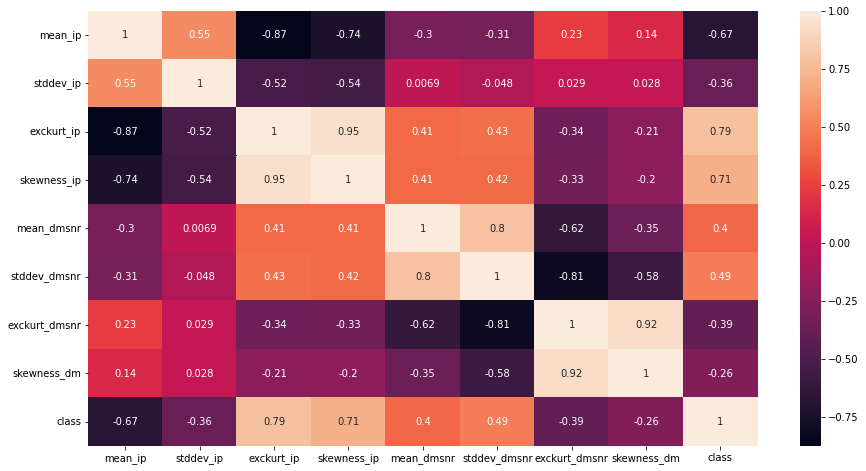

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#se utilizaran todas las variables, pero se evaluará la correlación entre ellas

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

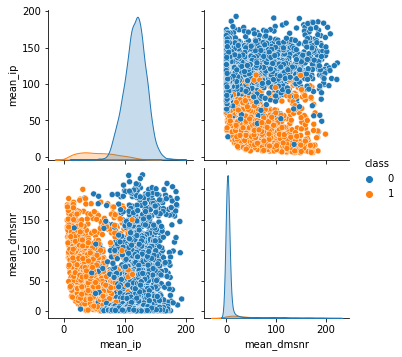

In [ ]:
sns.pairplot(df[['mean_ip','mean_dmsnr','class']], kind='scatter', hue='class')

1.1. Cluster con KMeans

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']
scaler = StandardScaler()
X_scaled = StandardScaler().fit_transform(X.values)
# X_scaled[0:10]

# Perform k-means with n_clusters=2
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X_scaled)

centers = kmeans.cluster_centers_
centers


array([[ 0.18672526,  0.07553473, -0.23473629, -0.21933608, -0.28823245,
        -0.28774043,  0.21068328,  0.12469276],
       [-1.43876535, -0.58201421,  1.80870252,  1.69003998,  2.2209039 ,
         2.21711276, -1.62336795, -0.96078922]])

In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_pred)

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para KMeans - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(10*'-----')

--------------------------------------------------
Resultados para KMeans - n_clusters=2
Homogeneity: 0.4390517180271925, Completeness: 0.3768522133991111, Mean Silhouette score: 0.3789200476104405
--------------------------------------------------


1.2.  Cluster con AgglomerativeClustering


In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo_hclust_complete = AgglomerativeClustering(n_clusters=2, 
                                     affinity='euclidean', 
                                     linkage='complete')

modelo_hclust_complete.fit(X=X_scaled)
y_pred = modelo_hclust_complete.fit_predict(X_scaled)


In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_pred)

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para AgglomerativeClustering - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(10*'-----')

--------------------------------------------------
Resultados para AgglomerativeClustering - n_clusters=2
Homogeneity: 0.5495013710623493, Completeness: 0.6682055447943352, Mean Silhouette score: 0.29670731047456045
--------------------------------------------------


1.3. Cluster con DBSCAN

In [ ]:
!pip install kneed

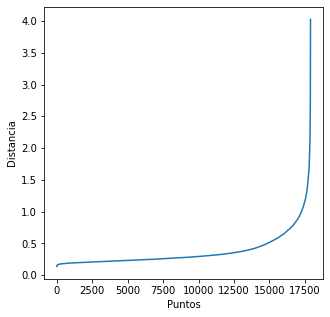

In [ ]:
#Tuning del eps

from sklearn.neighbors import NearestNeighbors
import numpy as np

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)
distances = np.sort(distances[:,10], axis=0)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
# plt.savefig("Distance_curve.png", dpi=300)
plt.show()

0.5660043189213712


<Figure size 360x360 with 0 Axes>

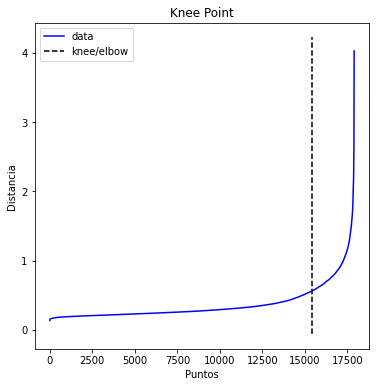

In [ ]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancia")

print(distances[knee.knee])
eps_opt = distances[knee.knee]

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=eps_opt, min_samples=25).fit(X_scaled)
labels = db.labels_

y_pred = DBSCAN(eps=eps_opt, min_samples=25).fit_predict(X_scaled)

In [6]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_pred)

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para DBSCAN')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(10*'-----')

--------------------------------------------------
Resultados para DBSCAN
Homogeneity: 0.42760926753730405, Completeness: 0.3099066128692552, Mean Silhouette score: 0.454946163217892
--------------------------------------------------



### 2. Selección de Caracteristicas

Ocupe al menos 3 técnicas de selección de características (1 de cada familia de técnicas) para quedarse con el subconjunto que maximice el indice de desempeño F1. Tambien genere un reporte de clasificación. Elija 1 algoritmo de clasificación para realizarlo.



2.1. Métodos de filtrado

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X, y, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(['mean_ip', 'stddev_ip', 'exckurt_ip', 'skewness_ip',
                          'mean_dmsnr', 'stddev_dmsnr', 'exckurt_dmsnr', 'skewness_dm'], MI_score):
    print(feature)


('mean_ip', 0.1919792758475265)
('stddev_ip', 0.08823451838523888)
('exckurt_ip', 0.2264379704010573)
('skewness_ip', 0.19451222834838888)
('mean_dmsnr', 0.11469002391244398)
('stddev_dmsnr', 0.11924799424186516)
('exckurt_dmsnr', 0.11339290952774439)
('skewness_dm', 0.11506426966847827)


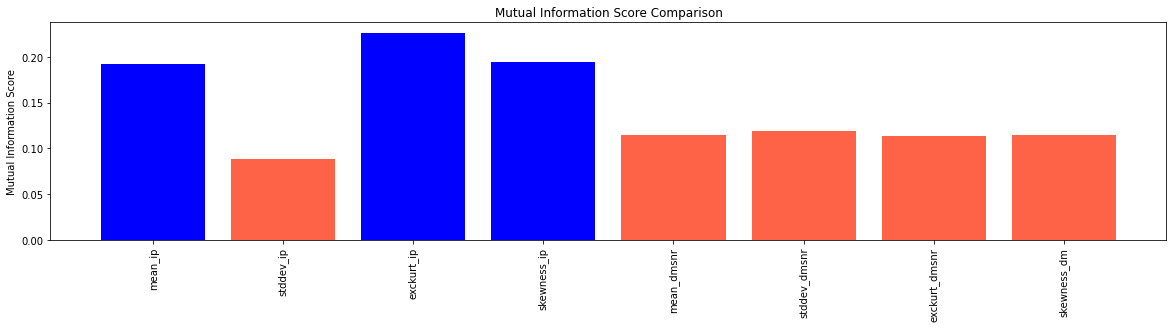

In [ ]:
# Create a bar chart for visualizing the mutual information scores

feature_names = ['mean_ip', 'stddev_ip', 'exckurt_ip', 'skewness_ip',
                          'mean_dmsnr', 'stddev_dmsnr', 'exckurt_dmsnr', 'skewness_dm']

plt.figure(figsize=(20,4))
# plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.bar(x=feature_names, height=np.where(MI_score<0.15, MI_score, 0), color='tomato', label='MI_score < 0.15')
plt.bar(x=feature_names, height=np.where(MI_score>=0.15, MI_score, 0), color='blue', label='MI_score >= 0.15')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(score_func=mutual_info_classif, # Set f_classif as our criteria to select features: f_classif, VarianceThreshold, mutual_info_classif
                  k=3)                  # Select top five features based on the criteria

X_data_new = skb.fit_transform(X, y)

# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])                  

- mean_ip
- exckurt_ip
- skewness_ip


2.2. Metodos Wrapper

In [ ]:
# Import SequentialFeatureSelector from Mlxtend
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          n_features_to_select=3,  # Consider any feature combination between 1 and 4
          direction='forward',       # Set forward to True when we want to perform SFS
          scoring='f1',       # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X, y)


In [ ]:
# Transform the dataset
X_data_new = sfs.transform(X)

# Print the results
print('Number of features before transformation: {}'.format(X.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

Number of features before transformation: 8
Number of features after transformation: 3


In [ ]:
# Print the name of the selected features

selected_features = np.array(feature_names)[sfs.get_support()]
for feature_ in selected_features:
    print('- ' + feature_) 

- mean_ip
- exckurt_ip
- skewness_dm


2.3. Metodos integrados

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Create a SelectFromModel object 
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.15) # that have an importance of more than 0.15

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

The most important features based on random forest classifier:
- mean_ip
- exckurt_ip
- skewness_ip


**Conclusión**: Se reitera que las variables más importantes del dataset son: (1) mean_ip, (2) exckurt_ip, (3) skewness_ip, y en menor medida, (4) skewness_dm.

### 3. Reducción de Dimensionalidad

Con el mismo algoritmo de clasificación anterior, ocupe PCA y Factor Analisis para reducir las dimensiones del problema, reporte el indice F1 y el reporte de clasificación. Comente las diferencias sobre los resultados obtenidos.

## 3.1. PCA

Realizamos un analisis de componentes para identificar aquellos que expliquen gran parte de la variabilodad del dataset sin perder demasiada información. Luego se procederá a utilizar el set de datos reducido para modelar y validar una regresión lógistica 

In [ ]:
from sklearn.decomposition import PCA
from sklearn import manifold

In [ ]:
pca_model = PCA(n_components=2)

pca = pca_model.fit(X_scaled)
pca_values = pca_model.transform(X_scaled)

print(pca_values.shape)
pca_values[:,0]

(17898, 2)


array([-1.27884879, -1.02055347,  0.18828859, ...,  0.68183395,
       -1.10391246,  3.71252289])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


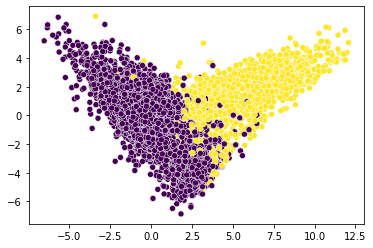

In [ ]:
#plotear las dos primeras componentes 
sns.scatterplot(pca_values[:, 0], pca_values[:, 1], c = y)

In [ ]:
# Perform k-means with n_clusters=2
kmeans = KMeans(n_clusters=2)
y_kmeans_pred = kmeans.fit_predict(pca_values)

In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_kmeans_pred)
completeness = metrics.completeness_score(y, y_kmeans_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_kmeans_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_kmeans_pred)

# f1-score
f1_value = metrics.f1_score(y, y_kmeans_pred, average='weighted')

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para KMeans/PCA - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(f'f1-score: {f1_value}')
print(10*'-----')
print('Reporte de clasificación')
print(metrics.classification_report(y, y_kmeans_pred))
print(10*'-----')

--------------------------------------------------
Resultados para KMeans - n_clusters=2
Homogeneity: 0.5412405725671507, Completeness: 0.666646177872421, Mean Silhouette score: 0.32695114126777286
f1-score: 0.965950301963051
--------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16259
           1       0.94      0.70      0.80      1639

    accuracy                           0.97     17898
   macro avg       0.95      0.85      0.89     17898
weighted avg       0.97      0.97      0.97     17898

--------------------------------------------------


In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo_hclust_complete = AgglomerativeClustering(n_clusters=2, 
                                     affinity='euclidean', 
                                     linkage='complete')

y_AggClu_pred = modelo_hclust_complete.fit_predict(pca_values)

In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_AggClu_pred)
completeness = metrics.completeness_score(y, y_AggClu_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_AggClu_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_AggClu_pred)

# f1-score
f1_value = metrics.f1_score(y, y_AggClu_pred, average='weighted')

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para KMeans/AgglomerativeClustering - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(f'f1-score: {f1_value}')
print(10*'-----')
print('Reporte de clasificación')
print(metrics.classification_report(y, y_AggClu_pred))
print(10*'-----')

--------------------------------------------------
Resultados para KMeans - n_clusters=2
Homogeneity: 0.3160710383289517, Completeness: 0.5998189414910331, Mean Silhouette score: 0.3367078057224723
f1-score: 0.9353584103290384
--------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16259
           1       0.99      0.41      0.58      1639

    accuracy                           0.95     17898
   macro avg       0.97      0.71      0.78     17898
weighted avg       0.95      0.95      0.94     17898

--------------------------------------------------


In [ ]:
TSNE_model = manifold.TSNE(n_components=2, learning_rate='auto',
                   init='random')

TSNE_values = TSNE_model.fit_transform(X_scaled)
# print(len(pca_values[:,0]))
TSNE_values.shape

(17898, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


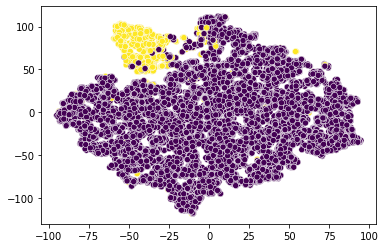

In [ ]:
#plotear las dos primeras componentes 
sns.scatterplot(TSNE_values[:, 0], TSNE_values[:, 1], c = y)

In [ ]:
# Perform k-means with n_clusters=2
kmeans = KMeans(n_clusters=2)
y_kmeans_pred = kmeans.fit_predict(TSNE_values)

In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_kmeans_pred)
completeness = metrics.completeness_score(y, y_kmeans_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_kmeans_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_kmeans_pred)

# f1-score
f1_value = metrics.f1_score(y, y_kmeans_pred, average='weighted')

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para KMeans/TSNE - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(f'f1-score: {f1_value}')
print(10*'-----')
print('Reporte de clasificación')
print(metrics.classification_report(y, y_kmeans_pred))
print(10*'-----')

--------------------------------------------------
Resultados para KMeans/TSNE - n_clusters=2
Homogeneity: 0.15623152863320489, Completeness: 0.06900962942296936, Mean Silhouette score: 0.3153805074249096
f1-score: 0.6676314679925129
--------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.99      0.55      0.71     16259
           1       0.17      0.94      0.29      1639

    accuracy                           0.58     17898
   macro avg       0.58      0.75      0.50     17898
weighted avg       0.92      0.58      0.67     17898

--------------------------------------------------


In [ ]:
from sklearn.cluster import AgglomerativeClustering

modelo_hclust_complete = AgglomerativeClustering(n_clusters=2, 
                                     affinity='euclidean', 
                                     linkage='complete')

y_AggClu_pred = modelo_hclust_complete.fit_predict(TSNE_values)

In [ ]:
from sklearn import metrics
    
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(y, y_AggClu_pred)
completeness = metrics.completeness_score(y, y_AggClu_pred)
    
# Calcular el Silhouette Coefficient para cada ejemplo.
s = metrics.silhouette_samples(X, y_AggClu_pred)
    
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X, y_AggClu_pred)

# f1-score
f1_value = metrics.f1_score(y, y_AggClu_pred, average='weighted')

# print(homogeneity)
# print(completeness)
# print(s)
# print(s_mean)

print(10*'-----')
print('Resultados para AgglomerativeClustering/TSNE - n_clusters=2')
print('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, s_mean))
print(f'f1-score: {f1_value}')
print(10*'-----')
print('Reporte de clasificación')
print(metrics.classification_report(y, y_AggClu_pred))
print(10*'-----')

--------------------------------------------------
Resultados para AgglomerativeClustering/TSNE - n_clusters=2
Homogeneity: 0.4689315873662999, Completeness: 0.33415530511695174, Mean Silhouette score: 0.33245214338083245
f1-score: 0.9258545187464584
--------------------------------------------------
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     16259
           1       0.53      0.89      0.66      1639

    accuracy                           0.92     17898
   macro avg       0.76      0.90      0.81     17898
weighted avg       0.95      0.92      0.93     17898

--------------------------------------------------


**Conclusión**: En general los resultados de clasificación mejoran cuando se divide los datos por componentes (PCA).